In [2]:
import sys
sys.path.append('/home/stav/Projects/token_voken/')

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.common.path_resolvers import resolve_interval_facial_embeddings_dir, resolve_interval_facial_embedding_path
from src.common.data_loader import load_valid_intervals
from src.common.constants import EMBEDDING_EXTENSION

In [4]:
df_intervals = load_valid_intervals()
df_intervals.shape

(2118, 20)

In [5]:
embedding_records = []

for i, row in df_intervals.iterrows():
    video_id, interval_id = row['video_id'], row['interval_id']
    interval_dir = resolve_interval_facial_embeddings_dir(interval_id)
    filenames = sorted(os.listdir(interval_dir))
    for filename in filenames:
        if filename.endswith(EMBEDDING_EXTENSION):
            frame_id = int(filename.split('.')[0])
            embedding_path = resolve_interval_facial_embedding_path(interval_id, frame_id)
            try:
                embedding = np.load(embedding_path)
            except Exception as e:
                print(f'Error {embedding_path} - {e}')
                embedding = np.zeros(16)
            embedding_records.append([video_id, interval_id, embedding, embedding_path])

Error /home/stav/Data/PATS_DATA/Videos/oliver/i8xwLWb0lLY/214062/FECNet/00055.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00229.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00230.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00231.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00232.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00233.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00234.npy - Cannot load file conta

In [6]:
len(embedding_records)

448610

In [7]:
df_embeddings = pd.DataFrame(embedding_records, columns=['video_id', 'interval_id', 'embedding', 'embedding_path'])

In [8]:
df_embeddings['embedding'][0].shape

(16,)

In [9]:
df_embeddings.head()

,video_id,interval_id,embedding,embedding_path
0,DRauXXz6t0Y,214429,"[0.08211029, -0.14161965, -0.28877425, -0.2099...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
1,DRauXXz6t0Y,214429,"[0.05263792, -0.15614271, -0.28997123, -0.1713...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
2,DRauXXz6t0Y,214429,"[0.08566623, -0.13370828, -0.26340023, -0.2189...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
3,DRauXXz6t0Y,214429,"[0.068895005, -0.16913441, -0.29542175, -0.166...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
4,DRauXXz6t0Y,214429,"[0.0931093, -0.12990531, -0.28520516, -0.18729...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [11]:
X = df_embeddings['embedding'].tolist()
X = np.stack(X, axis=0)
X.shape

(448610, 16)

In [12]:
X_new = pca.fit_transform(X)
X_new.shape

(448610, 2)

In [13]:
len(list(X_new))

448610

In [14]:
df_embeddings['embeddings_2d'] = list(X_new)

In [15]:
df_sample = df_embeddings.sample(n=500).copy()

In [16]:
X_sample = np.stack(df_sample['embeddings_2d'].tolist())

In [17]:
df_embeddings['embedding_path'][0].replace('npy', 'jpg').replace('FECNet', 'Faces')

'/home/stav/Data/PATS_DATA/Videos/oliver/DRauXXz6t0Y/214429/Faces/00000.jpg'

In [18]:
import cv2

In [19]:
X_sample[2,0]

-0.13819408811786005

In [20]:
X_sample.shape

(500, 2)

In [21]:
X_sample[2,1]

0.27680219293469777

In [24]:
X_sample[2,3]

IndexError: index 3 is out of bounds for axis 1 with size 2

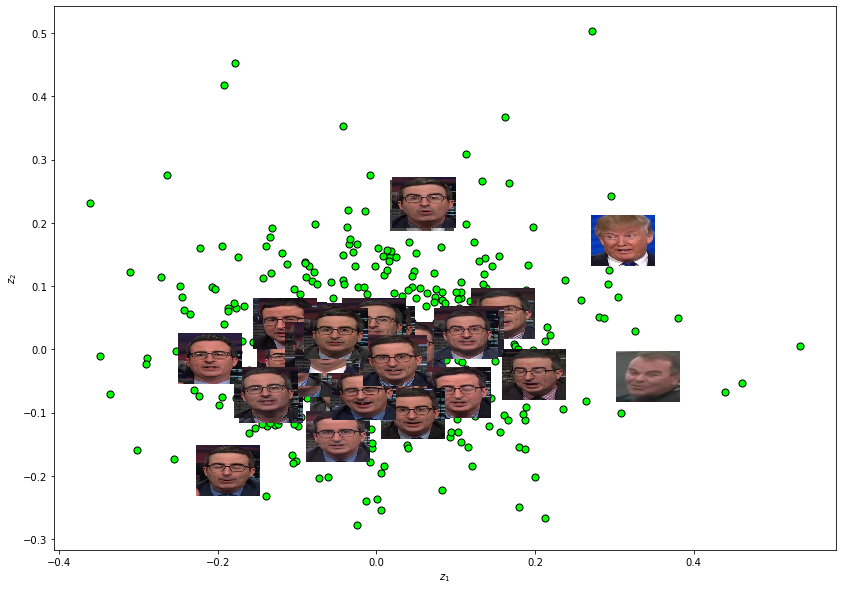

In [25]:
fig = plt.figure(figsize=(14, 10))

size = 0.04
for idx in range(2, 110, 3):
    img_path = df_sample.iloc[idx]['embedding_path'].replace('npy', 'jpg').replace('FECNet', 'Faces')
    im = cv2.imread(img_path)
    x0  = X_sample[idx,0] - size
    x1  = X_sample[idx,0] + size
    y0  = X_sample[idx,1] - size
    y1  = X_sample[idx,1] + size
#     mI  = np.reshape(mX[idx,:], vShape).T
    RGBimage = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(RGBimage, aspect='auto', zorder=1, extent=(x0, x1, y0, y1))
#     plt.imshow(im, aspect='auto', cmap='gray', zorder=1, extent=(x0, x1, y0, y1))

plt.scatter(X_sample[:,0], X_sample[:,1], s=50, c='lime', edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
    
plt.show()

In [26]:
from IPython.display import Image, display

____idx=2, path=/home/stav/Data/PATS_DATA/Videos/oliver/PuNIwYsz7PI/104775/Faces/00081.jpg


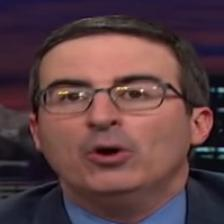

____idx=5, path=/home/stav/Data/PATS_DATA/Videos/oliver/GUizvEjR-0U/101218/Faces/00091.jpg


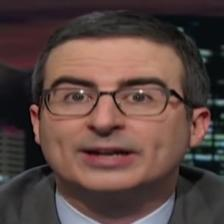

____idx=8, path=/home/stav/Data/PATS_DATA/Videos/oliver/fpbOEoRrHyU/102943/Faces/00017.jpg


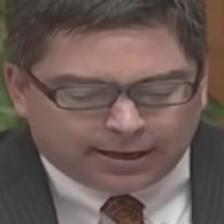

____idx=11, path=/home/stav/Data/PATS_DATA/Videos/oliver/Wpzvaqypav8/106298/Faces/00001.jpg


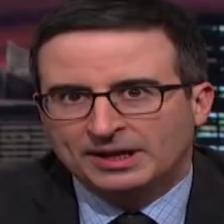

____idx=14, path=/home/stav/Data/PATS_DATA/Videos/oliver/hxUAntt1z2c/214761/Faces/00082.jpg


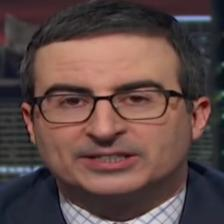

____idx=17, path=/home/stav/Data/PATS_DATA/Videos/oliver/DRauXXz6t0Y/216913/Faces/00053.jpg


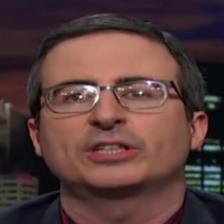

____idx=20, path=/home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/101843/Faces/00213.jpg


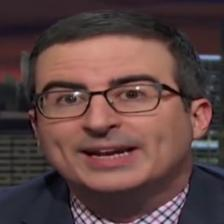

____idx=23, path=/home/stav/Data/PATS_DATA/Videos/oliver/vU8dCYocuyI/214734/Faces/00008.jpg


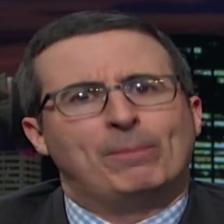

____idx=26, path=/home/stav/Data/PATS_DATA/Videos/oliver/xecEV4dSAXE/103054/Faces/00333.jpg


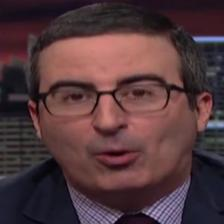

____idx=29, path=/home/stav/Data/PATS_DATA/Videos/oliver/_S2G8jhhUHg/102614/Faces/00289.jpg


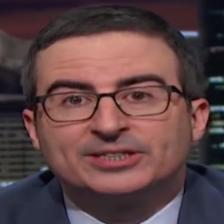

____idx=32, path=/home/stav/Data/PATS_DATA/Videos/oliver/6UsHHOCH4q8/101891/Faces/00067.jpg


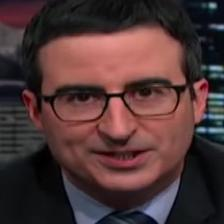

____idx=35, path=/home/stav/Data/PATS_DATA/Videos/oliver/fpbOEoRrHyU/101274/Faces/00202.jpg


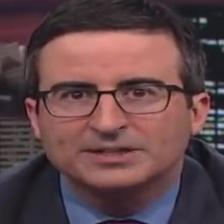

____idx=38, path=/home/stav/Data/PATS_DATA/Videos/oliver/XEVlyP4_11M/105500/Faces/00032.jpg


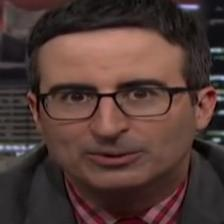

____idx=41, path=/home/stav/Data/PATS_DATA/Videos/oliver/b436uUuf_VI/216593/Faces/00085.jpg


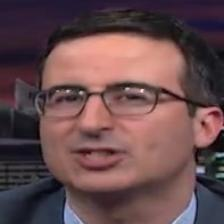

____idx=44, path=/home/stav/Data/PATS_DATA/Videos/oliver/fyVz5vgqBhE/214346/Faces/00353.jpg


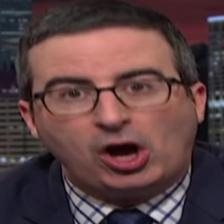

____idx=47, path=/home/stav/Data/PATS_DATA/Videos/oliver/xecEV4dSAXE/106032/Faces/00054.jpg


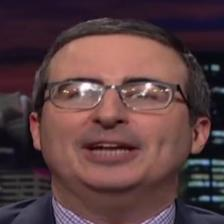

____idx=50, path=/home/stav/Data/PATS_DATA/Videos/oliver/vU8dCYocuyI/216641/Faces/00043.jpg


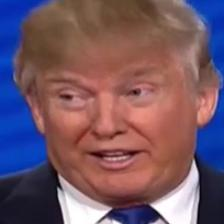

____idx=53, path=/home/stav/Data/PATS_DATA/Videos/oliver/_Pz3syET3DY/102146/Faces/00050.jpg


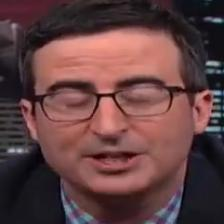

____idx=56, path=/home/stav/Data/PATS_DATA/Videos/oliver/_S2G8jhhUHg/102614/Faces/00382.jpg


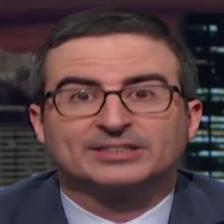

____idx=59, path=/home/stav/Data/PATS_DATA/Videos/oliver/xcwJt4bcnXs/104761/Faces/00228.jpg


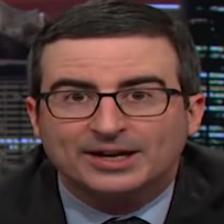

____idx=62, path=/home/stav/Data/PATS_DATA/Videos/oliver/hxUAntt1z2c/214758/Faces/00077.jpg


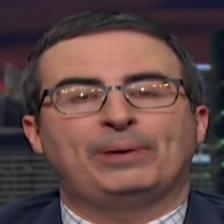

____idx=65, path=/home/stav/Data/PATS_DATA/Videos/oliver/DlJEt2KU33I/216945/Faces/00198.jpg


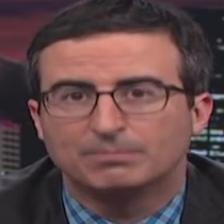

____idx=68, path=/home/stav/Data/PATS_DATA/Videos/oliver/i8xwLWb0lLY/214065/Faces/00185.jpg


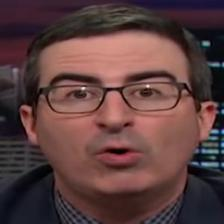

____idx=71, path=/home/stav/Data/PATS_DATA/Videos/oliver/AJm8PeWkiEU/214741/Faces/00302.jpg


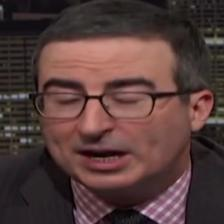

____idx=74, path=/home/stav/Data/PATS_DATA/Videos/oliver/E_F5GxCwizc/103351/Faces/00033.jpg


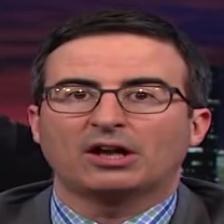

____idx=77, path=/home/stav/Data/PATS_DATA/Videos/oliver/l_htSPGAY7I/215350/Faces/00109.jpg


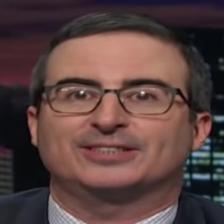

____idx=80, path=/home/stav/Data/PATS_DATA/Videos/oliver/PuNIwYsz7PI/101026/Faces/00022.jpg


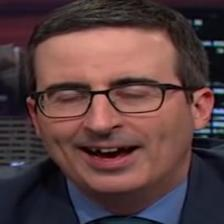

____idx=83, path=/home/stav/Data/PATS_DATA/Videos/oliver/KUdHIatS36A/215414/Faces/00118.jpg


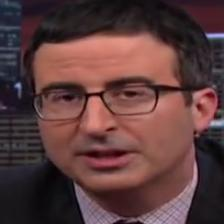

____idx=86, path=/home/stav/Data/PATS_DATA/Videos/oliver/hmoAX9f6MOc/103825/Faces/00038.jpg


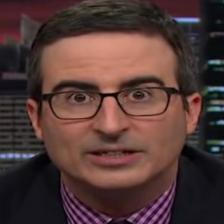

____idx=89, path=/home/stav/Data/PATS_DATA/Videos/oliver/PDylgzybWAw/103591/Faces/00092.jpg


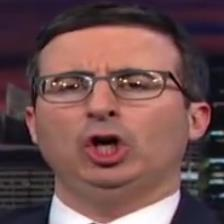

____idx=92, path=/home/stav/Data/PATS_DATA/Videos/oliver/yw_nqzVfxFQ/216661/Faces/00455.jpg


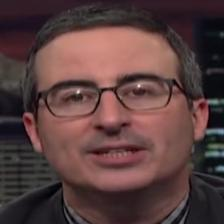

____idx=95, path=/home/stav/Data/PATS_DATA/Videos/oliver/6UsHHOCH4q8/102098/Faces/00066.jpg


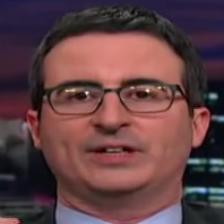

____idx=98, path=/home/stav/Data/PATS_DATA/Videos/oliver/PuNIwYsz7PI/101027/Faces/00050.jpg


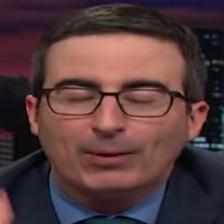

____idx=101, path=/home/stav/Data/PATS_DATA/Videos/oliver/J6lyURyVz7k/101826/Faces/00311.jpg


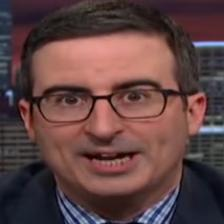

____idx=104, path=/home/stav/Data/PATS_DATA/Videos/oliver/7y1xJAVZxXg/104416/Faces/00334.jpg


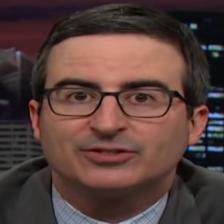

____idx=107, path=/home/stav/Data/PATS_DATA/Videos/oliver/BUCnjlTfXDw/215784/Faces/00071.jpg


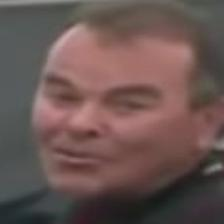

In [27]:
for idx in range(2, 110, 3):
    img_path = df_sample.iloc[idx]['embedding_path'].replace('npy', 'jpg').replace('FECNet', 'Faces')
    print(f'____idx={idx}, path={img_path}')
    display(Image(img_path))

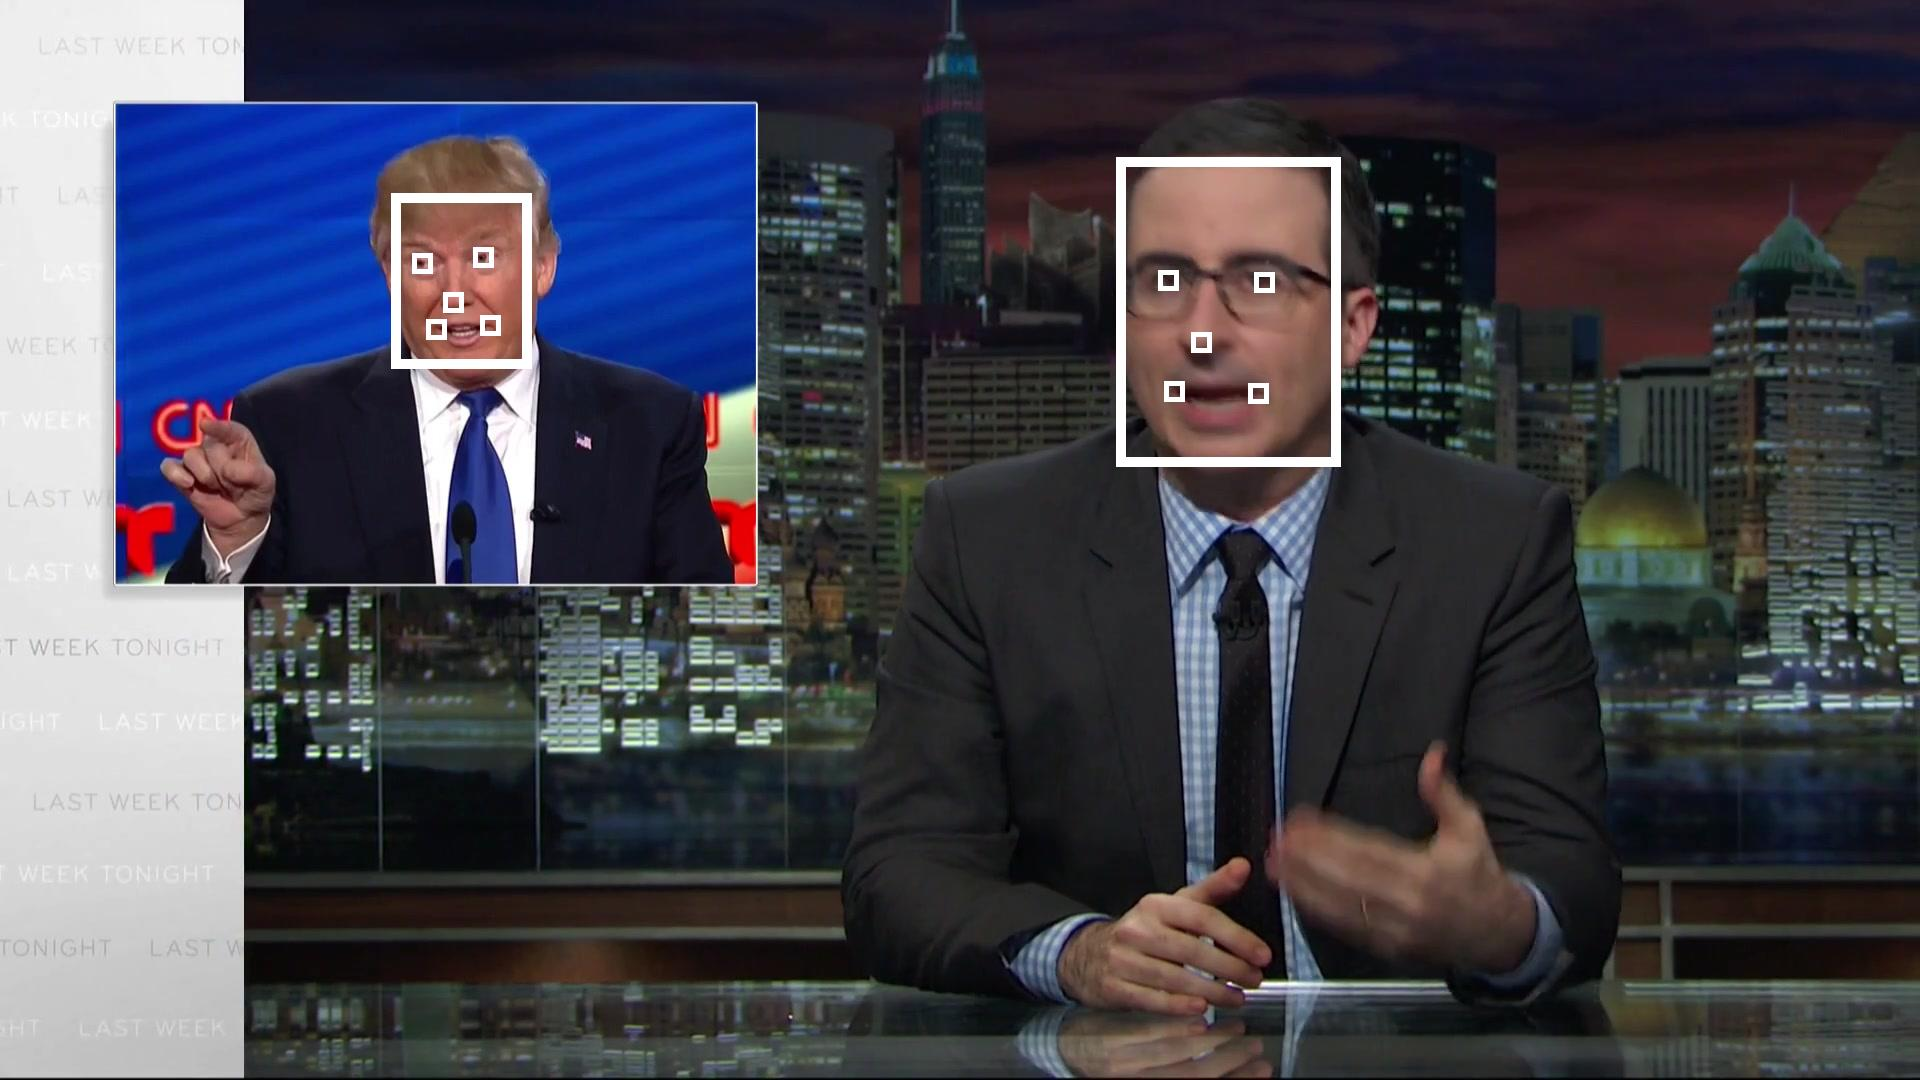

In [31]:
display(Image('/home/stav/Data/PATS_DATA/Videos/oliver/vU8dCYocuyI/216641/FacesAll/00050/annotated_faces.jpg'))